## Анализ данных в задаче кредитного скоринга

Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский )

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. 

Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь

PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре

default - индикатор невозврата денежных средств

#### Импортируем библиотеки и загрузим данные

In [23]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
import matplotlib.pyplot as plt

In [2]:
scoring = pd.read_csv('credit_card_default_analysis.csv')
scoring

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


#### Задание

## 1.
Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [47]:
# Приготовим две выборки тех кто вернул кредит и тех кто не вернул кредит
Vernul = scoring[scoring['default'] == 0].LIMIT_BAL.values
NeVernul = scoring[scoring['default'] == 1].LIMIT_BAL.values

In [1]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(scoring[scoring['default'] == 0].LIMIT_BAL, bins = 20, color = 'b', label = 'Vernul')
plt.legend()

plt.subplot(1,2,2)
plt.hist(scoring[scoring['default'] == 1].LIMIT_BAL, bins = 20, color = 'r', label = 'NeVernul')
plt.legend()

plt.show()

NameError: name 'plt' is not defined

Для проверки гипотезы о равенстве медианных значений буду использовать интервальную оценку на основе бутстрепа

In [19]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [195]:
np.random.seed(0)

Vernul_median_scores = list(map(np.median, get_bootstrap_samples(Vernul, 1000)))
NeVernul_median_scores = list(map(np.median, get_bootstrap_samples(NeVernul, 1000)))

print("95% доверительный итервал медианного значение кредитного лимита для вернувших кредит:",  stat_intervals(Vernul_median_scores, 0.05))
print("95% доверительный итервал медианного значение кредитного лимита для невернувших кредит:",  stat_intervals(NeVernul_median_scores, 0.05))

95% доверительный итервал медианного значение кредитного лимита для вернувших кредит: [150000. 150000.]
95% доверительный итервал медианного значение кредитного лимита для невернувших кредит: [80000. 90000.]


Как видно из интервальной оценки, медианы не совпадают. Заёмщики, которые не возвращают кредит, обычно берут меньшую сумму.

Для проверки гипотезы о равенстве распределений подойдёт перестановочный критерий для независимых выборок.

H0: распределения выборок полностью равны
    
H1: распределения выборок отличаются на величину сдвига

In [223]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample1, sample2, max_permutations=None, alternative='two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample1, sample2)
    
    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [224]:
print('p-value: %f' % permutation_test(scoring.LIMIT_BAL.loc[scoring.default == 0].values,
                                       scoring.LIMIT_BAL.loc[scoring.default == 1].values,
                                       max_permutations=1000))

p-value: 0.001000


P-value очень маленький и нулевая гипотеза отвергается на уровне значимости 0.05.

Результат является практически значимым, потому что разница в значениях медианы LIMIT_BAL значимо большая.

## 2.
Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)


In [185]:
# Приготовим выборки тех кто вернул кредит и тех кто не вернул кредит с учетом различий по полу
Vernul_Sex = scoring[scoring['default'] == 0][['LIMIT_BAL',  'SEX']]
NeVernul_Sex = scoring[scoring['default'] == 1][['LIMIT_BAL',  'SEX']]

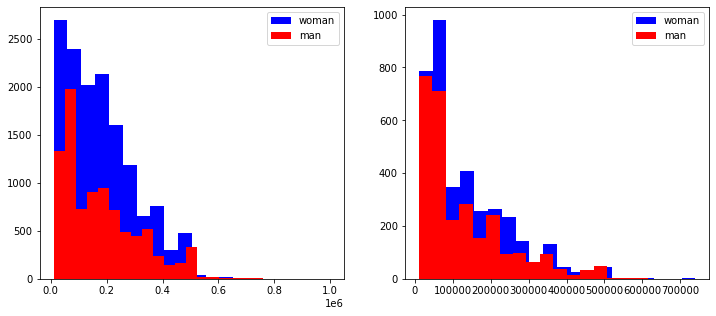

In [177]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(Vernul_Sex[Vernul_Sex['SEX'] == 2].LIMIT_BAL, bins = 20, color = 'b', label = 'woman')
plt.hist(Vernul_Sex[Vernul_Sex['SEX'] == 1].LIMIT_BAL, bins = 20, color = 'r', label = 'man')
plt.legend()

plt.subplot(1,2,2)
plt.hist(NeVernul_Sex[NeVernul_Sex['SEX'] == 2].LIMIT_BAL, bins = 20, color = 'b', label = 'woman')
plt.hist(NeVernul_Sex[NeVernul_Sex['SEX'] == 1].LIMIT_BAL, bins = 20, color = 'r', label = 'man')
plt.legend()

plt.show()

In [61]:
from statsmodels.stats.proportion import proportion_confint

In [74]:
Vernul_Sex.SEX = Vernul_Sex.SEX.apply(lambda x: 0 if x == 2 else 1)
NeVernul_Sex.SEX = NeVernul_Sex.SEX.apply(lambda x: 0 if x == 2 else 1)

In [191]:
conf_interval_Vernul_m = proportion_confint(len(Vernul_Sex[Vernul_Sex['SEX'] == 1].SEX), 
                                            Vernul_Sex.shape[0],
                                            method = 'wilson')
conf_interval_Vernul_w = proportion_confint(len(Vernul_Sex[Vernul_Sex['SEX'] == 2].SEX), 
                                            Vernul_Sex.shape[0],
                                            method = 'wilson')
conf_interval_NeVernul_m = proportion_confint(len(NeVernul_Sex[NeVernul_Sex['SEX'] == 1].SEX), 
                                            NeVernul_Sex.shape[0],
                                            method = 'wilson')
conf_interval_NeVernul_w = proportion_confint(len(NeVernul_Sex[NeVernul_Sex['SEX'] == 2].SEX), 
                                            NeVernul_Sex.shape[0],
                                            method = 'wilson')

In [192]:
print('95%% доверительный интервал доли мужчин среди вернувших кредит: [%f, %f]' % conf_interval_Vernul_m)
print('95%% доверительный интервал доли женщин среди вернувших кредит: [%f, %f]' % conf_interval_Vernul_w)
print('95%% доверительный интервал доли мужчин среди не вернувших кредит [%f, %f]' % conf_interval_NeVernul_m)
print('95%% доверительный интервал доли женщин среди не вернувших кредит [%f, %f]' % conf_interval_NeVernul_w)

95% доверительный интервал доли мужчин среди вернувших кредит: [0.379627, 0.392110]
95% доверительный интервал доли женщин среди вернувших кредит: [0.607890, 0.620373]
95% доверительный интервал доли мужчин среди не вернувших кредит [0.421062, 0.444898]
95% доверительный интервал доли женщин среди не вернувших кредит [0.555102, 0.578938]


Здесь мы можем видеть, что доверительные интервалы долей мужчин и женщин в группах вернувших кредит и невернувших кредит не пересекаются, следовательно гендерные составы групп различны.
Так же гипотезу о равенстве гендерного сотава этих групп мы можем проверить с помощью корреляции Мэтьюса

In [173]:
sex_table = pd.DataFrame(columns = ['Пол', 'Вернули', 'Не вернули'])
for i in range(2):
    sex_table.loc[i] = ['мужской' if i == 1 else 'женский',
                        len(Vernul_Sex[Vernul_Sex['SEX'] == i]), 
                        len(NeVernul_Sex[NeVernul_Sex['SEX'] == i])]

In [174]:
sex_table

,Пол,Вернули,Не вернули
0,женский,14349,3763
1,мужской,9015,2873


Для расчета корреляции Мэтьюса воспользуемся формулой
$$C(D,M) = \frac{TP*TN - FP*FN}{\sqrt{(TP + FN)(TP + FP)(TN + FN)(TN + FN)}}$$

In [182]:
TP = sex_table.loc[0][1]
FP = sex_table.loc[1][1]
FN = sex_table.loc[0][2]
TN = sex_table.loc[1][2]

In [184]:
C = (TP*TN - FP*FN)/((TP + FN)*(TP + FP)*(TN + FN)*(TN + FN))**0.5
C

0.053485119155860496

Коэффициент Мэтьюса близок к нулю, что говорит о разности в гендерных составах групп

## 3.
Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

In [88]:
# Приготовим выборки тех кто вернул кредит и тех кто не вернул кредит с учетом различий по образованию
Vernul_Edu = scoring[scoring['default'] == 0][['LIMIT_BAL',  'EDUCATION']]
NeVernul_Edu = scoring[scoring['default'] == 1][['LIMIT_BAL',  'EDUCATION']]

In [105]:
edu_dict = { 0: 'доктор',
            1: 'магистр',
            2: 'бакалавр',
            3: 'выпускник школы',
            4: 'начальное образование',
            5: 'прочее',
            6: 'нет данных'
           }

In [106]:
Vernul_Edu['Edu_name'] = Vernul_Edu.EDUCATION.apply(lambda x : edu_dict.get(x))
NeVernul_Edu['Edu_name'] = NeVernul_Edu.EDUCATION.apply(lambda x : edu_dict.get(x))

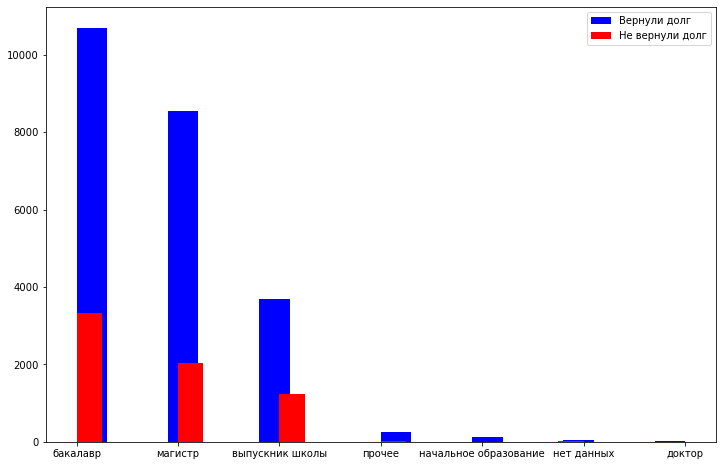

In [107]:
plt.figure(figsize(12, 8))
plt.hist(Vernul_Edu.Edu_name, bins = 20, color = 'b', label = 'Вернули долг')
plt.hist(NeVernul_Edu.Edu_name, bins = 20, color = 'r', label = 'Не вернули долг')
plt.legend()

plt.show()

In [164]:
edu_table = pd.DataFrame(columns = ['Образование', 'Вернули', 'Не вернули'])
for i in range(7):
    edu_table.loc[i] = [edu_dict.get(i),
                            len(Vernul_Edu[Vernul_Edu['EDUCATION'] == i]), 
                            len(NeVernul_Edu[NeVernul_Edu['EDUCATION'] == i])]

In [193]:
edu_table = edu_table.set_index('Образование')
edu_table

,Вернули,Не вернули
Образование,,
доктор,14,0
магистр,8549,2036
бакалавр,10700,3330
выпускник школы,3680,1237
начальное образование,116,7
прочее,262,18
нет данных,43,8


In [194]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(edu_table)
stat, p, dof, expected

(163.21655786997073,
 1.2332626245415605e-32,
 6,
 array([[1.0903200e+01, 3.0968000e+00],
        [8.2435980e+03, 2.3414020e+03],
        [1.0926564e+04, 3.1034360e+03],
        [3.8293596e+03, 1.0876404e+03],
        [9.5792400e+01, 2.7207600e+01],
        [2.1806400e+02, 6.1936000e+01],
        [3.9718800e+01, 1.1281200e+01]]))

## 4.
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [108]:
# Приготовим выборки тех кто вернул кредит и тех кто не вернул кредит с учетом семейного положения
Vernul_Mar = scoring[scoring['default'] == 0][['LIMIT_BAL',  'MARRIAGE']]
NeVernul_Mar = scoring[scoring['default'] == 1][['LIMIT_BAL',  'MARRIAGE']]

In [109]:
mar_dict = {0: 'отказываюсь отвечать',
            1: 'замужем/женат',
            2: 'холост',
            3: 'нет данных'
           }

In [124]:
list(mar_dict.keys())

[0, 1, 2, 3]

In [110]:
Vernul_Mar['Mar_name'] = Vernul_Mar.MARRIAGE.apply(lambda x : mar_dict.get(x))
NeVernul_Mar['Mar_name'] = NeVernul_Mar.MARRIAGE.apply(lambda x : mar_dict.get(x))

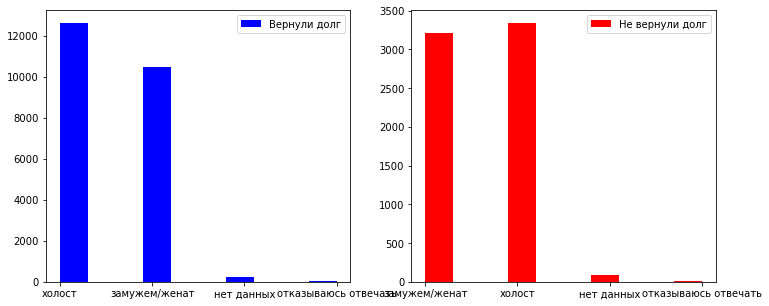

In [114]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(Vernul_Mar.Mar_name, color = 'b', label = 'Вернули долг')
plt.legend()

plt.subplot(1,2,2)
plt.hist(NeVernul_Mar.Mar_name, color = 'r', label = 'Не вернули долг')
plt.legend()

plt.show()

In [166]:
mar_table = pd.DataFrame(columns = ['Статус', 'Вернули', 'Не вернули'])
for i in range(4):
    mar_table.loc[i] = [mar_dict.get(i),
                        len(Vernul_Mar[Vernul_Mar['MARRIAGE'] == i]), 
                        len(NeVernul_Mar[NeVernul_Mar['MARRIAGE'] == i])]

In [204]:
mar_table = mar_table.set_index('Статус')
mar_table

,Вернули,Не вернули
Статус,,
отказываюсь отвечать,49,5
замужем/женат,10453,3206
холост,12623,3341
нет данных,239,84


In [205]:
stat, p, dof, expected = chi2_contingency(mar_table)
stat, p, dof, expected

(35.66239583433609,
 8.825862457577375e-08,
 3,
 array([[4.20552000e+01, 1.19448000e+01],
        [1.06376292e+04, 3.02137080e+03],
        [1.24327632e+04, 3.53123680e+03],
        [2.51552400e+02, 7.14476000e+01]]))

In [206]:
n = mar_table.sum()
print(np.sqrt(stat / (n*(min(mar_table.shape)-1))))

Вернули       0.039069
Не вернули    0.073308
dtype: float64


## 5.
Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [113]:
# Приготовим выборки тех кто вернул кредит и тех кто не вернул кредит с учетом возраста
Vernul_Age = scoring[scoring['default'] == 0][['LIMIT_BAL',  'AGE']]
NeVernul_Age = scoring[scoring['default'] == 1][['LIMIT_BAL',  'AGE']]

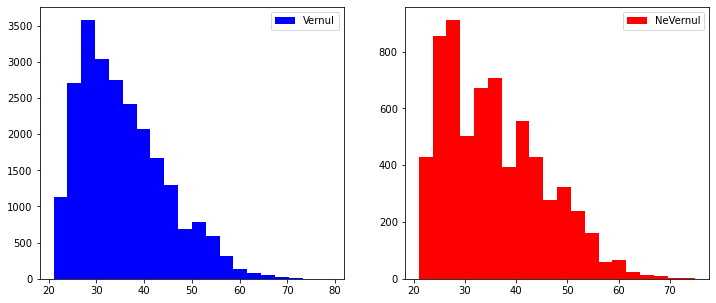

In [117]:
plt.figure(figsize(12, 5))
plt.subplot(1,2,1)
plt.hist(Vernul_Age.AGE, bins = 20, color = 'b', label = 'Vernul')
plt.legend()

plt.subplot(1,2,2)
plt.hist(NeVernul_Age.AGE, bins = 20, color = 'r', label = 'NeVernul')
plt.legend()

plt.show()

In [198]:
np.random.seed(0)

Vernul_age_median_scores = list(map(np.median, get_bootstrap_samples(Vernul_Age.AGE.values, 1000)))
NeVernul_age_median_scores = list(map(np.median, get_bootstrap_samples(NeVernul_Age.AGE.values, 1000)))

print("95% доверительный итервал медианного значения возраста для вернувших кредит:",  stat_intervals(Vernul_age_median_scores, 0.05))
print("95% доверительный итервал медианного значения возраста лимита для невернувших кредит:",  stat_intervals(NeVernul_age_median_scores, 0.05))

95% доверительный итервал медианного значения возраста для вернувших кредит: [34. 34.]
95% доверительный итервал медианного значения возраста лимита для невернувших кредит: [34. 35.]


In [203]:
print('95%% доверительный интервал среднего возраста вернувших долг: [%f, %f]' % zconfint(Vernul_Age.AGE))
print('95%% доверительный интервал среднего возраста не вернувших долг: [%f, %f]' % zconfint(NeVernul_Age.AGE))

95% доверительный интервал среднего возраста вернувших долг: [35.300871, 35.533661]
95% доверительный интервал среднего возраста не вернувших долг: [35.492515, 35.958962]


Сначала проверим равны ли распределения двух выборок:

In [200]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(Vernul_Age.AGE, NeVernul_Age.AGE)
stat, p

(76966879.5, 0.1862517717449308)

Видим, что медианы возрастов совпадают и критерий Манна-Уитни это подтверждает, отвергнуть нулевую гипотезу о том что медианы равны мы не можем. В итоге делаем вывод что распределение возрастов среди тех кто вернул кредит и не вернул кредит приблизительно одинаковые. Что собственно и показывает график сверху.